In [1]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow.keras.callbacks import TensorBoard
plt.rcParams["figure.figsize"] = (2, 2)

In [3]:
(X_train,y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape    #28X28 pixel Image

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

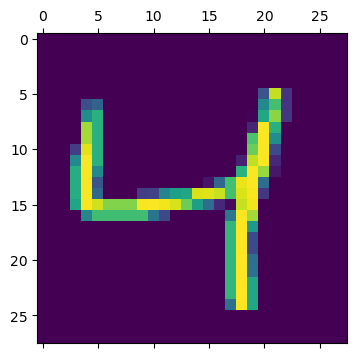

In [50]:
plt.matshow(X_train[2])

In [9]:
y_train[2]

4

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train = X_train/255   #Scaling is done to improve the accuracy of the model
X_test = X_test/255    

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [15]:
X_train_flattened.shape

(60000, 784)

In [16]:
X_test_flattened.shape

(10000, 784)

In [17]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
#Sequential means having a stack of layers in my neural network
#Sequential allows us to specify a neural network
#keras.layers.Dense In this way we are defining both our input and output layers
#Epoch means going through all the training data samples at once

In [19]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')             #Dense means all neurons in one layer are connected to every single neuron in the 2nd layer
    
])
model.compile(
    optimizer = 'adam',  #optimizer is used for efficiently training our model
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4677 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3040 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2833 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9256


In [20]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2646 - accuracy: 0.9256


[0.26458996534347534, 0.925599992275238]

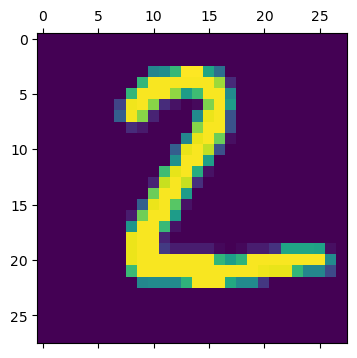

In [37]:
plt.matshow(X_test[1])

In [22]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 [==============================] - 1s 2ms/step


array([3.3492908e-01, 5.4882332e-03, 9.9970251e-01, 4.2452371e-01,
       5.6817734e-10, 8.6035830e-01, 8.0359721e-01, 1.3560196e-12,
       2.7170008e-01, 2.1558764e-09], dtype=float32)

In [23]:
np.argmax(y_predicted[1])

2

In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [25]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [26]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    3,    2,    0,    6,    6,    3,    3,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   3,    8,  938,   15,    7,    4,    9,    9,   35,    4],
       [   1,    0,   22,  923,    0,   20,    1,   10,   24,    9],
       [   1,    1,    9,    2,  912,    0,    7,    4,   10,   36],
       [   7,    3,    7,   42,    7,  775,    8,    6,   31,    6],
       [  11,    3,   12,    1,    7,   22,  896,    2,    4,    0],
       [   1,    8,   25,    5,    7,    1,    0,  942,    2,   37],
       [   3,    7,    7,   23,    9,   24,    4,   10,  879,    8],
       [   9,    7,    2,   13,   25,    7,    0,   16,    5,  925]])>

Text(95.72222222222221, 0.5, 'Actual')

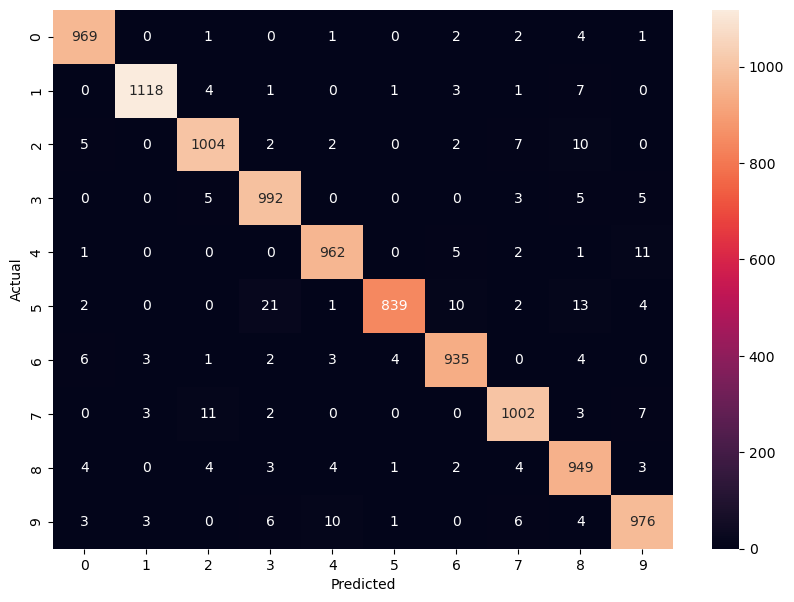

In [38]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [28]:
#Adding a hidden layer to improve the accuracy of the model

In [29]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid') #Dense means all neurons in one layer are connected to every single neuron in the 2nd layer
    
])
model.compile(
    optimizer = 'adam',  #optimizer is used for efficiently training our model
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2704 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1221 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0848 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0634 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0497 - accuracy: 0.9848


In [30]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0817 - accuracy: 0.9746


[0.08171355724334717, 0.9746000170707703]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Actual')

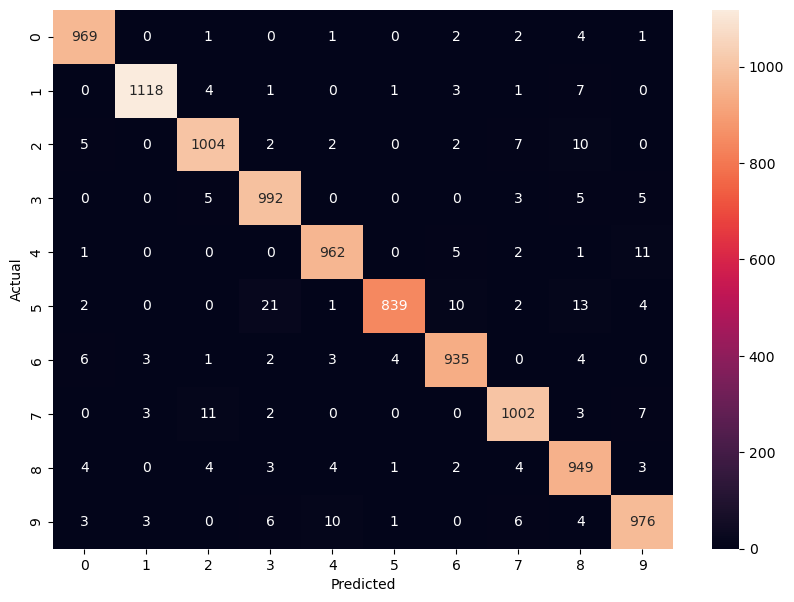

In [31]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid') #Dense means all neurons in one layer are connected to every single neuron in the 2nd layer
    
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir = "logs/", histogram_freq = 1)

model.compile(
    optimizer = 'adam',  #optimizer is used for efficiently training our model
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train, y_train, epochs = 5, callbacks = [tb_callback])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2765 - accuracy: 0.9216
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1258 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0887 - accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0679 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0532 - accuracy: 0.9837


In [33]:
# %load_ext tensorboard
# %tensorboard --logdir = logs/fit
# logfolder = "logs"